In [2]:
import pandas as pd
import numpy as np 
import mplsoccer as mpl 
from mplsoccer import Pitch
import matplotlib.pyplot as plt



In [3]:
from statsbombpy import sb

In [4]:
cID = 55
sID = 282

In [20]:
sb.matches(55,282).count()

match_id                 51
match_date               51
kick_off                 51
competition              51
season                   51
home_team                51
away_team                51
home_score               51
away_score               51
match_status             51
match_status_360         51
last_updated             51
last_updated_360         51
match_week               51
competition_stage        51
stadium                  51
referee                  51
home_managers            51
away_managers            51
data_version             51
shot_fidelity_version    51
xy_fidelity_version      51
dtype: int64

Getting map of the player id and player names from the final of the euro match 

In [6]:
matchId = 3943043
# Fetch the lineup data for the match with ID 3943043
lineup = sb.lineups(3943043)



# Fetch the lineup data for the match with ID 3943043
lineup = sb.lineups(3943043)

# Initialize an empty DataFrame to hold the combined lineup data
all_lineups_df = pd.DataFrame()

# Iterate over each team's lineup
for team_name, players_df in lineup.items():
    # Add team information to each player
    players_df['team_name'] = team_name
    
    # Append to the combined DataFrame
    all_lineups_df = pd.concat([all_lineups_df, players_df], ignore_index=True)

# Print the combined lineup DataFrame
spain_lineup_df = all_lineups_df[all_lineups_df['team_name']=='Spain']
england_lineup_df  = all_lineups_df[all_lineups_df['team_name']=='England']




In [7]:
england_lineup_df

,player_id,player_name,player_nickname,jersey_number,country,cards,positions,team_name
24,3088,Lewis Dunk,None,15,England,[],[],England
25,3205,Kyle Walker,None,2,England,[],"[{'position_id': 2, 'position': 'Right Back', ...",England
26,3244,John Stones,None,5,England,"[{'time': '52:31', 'card_type': 'Yellow Card',...","[{'position_id': 3, 'position': 'Right Center ...",England
27,3308,Kieran Trippier,None,12,England,[],[],England
28,3382,Luke Shaw,None,3,England,[],"[{'position_id': 6, 'position': 'Left Back', '...",England
29,3468,Jordan Pickford,None,1,England,[],"[{'position_id': 1, 'position': 'Goalkeeper', ...",England
30,3495,Joe Gomez,None,22,England,[],[],England
31,3664,Trent Alexander-Arnold,None,8,England,[],[],England
32,3822,Ezri Konsa Ngoyo,Ezri Konsa,14,England,[],[],England
33,3834,Ivan Toney,None,17,England,[],"[{'position_id': 21, 'position': 'Left Wing', ...",England


In [8]:
events = sb.events(match_id=matchId)
events_df = pd.DataFrame(events)
events_df.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Block', 'Dispossessed', 'Duel',
       'Dribble', 'Ball Recovery', 'Clearance', 'Interception',
       'Dribbled Past', 'Foul Committed', 'Foul Won', 'Shot',
       'Goal Keeper', 'Injury Stoppage', 'Referee Ball-Drop', '50/50',
       'Half End', 'Substitution', 'Shield', 'Tactical Shift', 'Error'],
      dtype=object)

In [19]:
# Filter the DataFrame for pass events
pass_df = events_df[events_df['type'] == 'Pass']

clean_pass_df = pass_df.copy()
# Print the resulting DataFrame to verify the result
# clean_pass_df.columns
clean_pass_df.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [10]:
pass_df.columns
deleteCols = ['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type']
clean_pass_df.drop(columns=deleteCols,inplace=True)

In [11]:
# Split 'location' into 'location_x' and 'location_y'
clean_pass_df[['location_x', 'location_y']] = clean_pass_df['location'].apply(pd.Series)

# Split 'pass_end_location' into 'pass_end_location_x' and 'pass_end_location_y'
clean_pass_df[['pass_end_location_x', 'pass_end_location_y']] = clean_pass_df['pass_end_location'].apply(pd.Series)



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Function to plot pass map with different colors for different pass lengths
def plot_pass_map(pass_dataframe, color_map):
    """
    Plots a football pitch with arrows representing passes from the given DataFrame.
    Different pass lengths are color-coded. A small circle is plotted at the source of each pass.

    Parameters:
    - pass_dataframe (pd.DataFrame): DataFrame containing pass events with 'location', 'pass_end_location', 'period', 'pass_outcome', and 'pass_length' columns.
    - color_map (dict): Dictionary with color mappings for different pass lengths.
    """

    # Create a football pitch
    pitch = Pitch(pitch_type='statsbomb', line_color='black')
    fig, ax = pitch.draw(figsize=(10, 7))

    # Plot the passes
    for i, row in pass_dataframe.iterrows():
        start_location = row['location']
        end_location = row['pass_end_location']
        period = row['period']
        pass_outcome = row['pass_outcome']
        pass_length = row['pass_length']
        
        # Check if start_location and end_location are valid lists with no NaN values
        if isinstance(start_location, list) and isinstance(end_location, list):
            if len(start_location) == 2 and len(end_location) == 2:
                # Extract x and y coordinates
                start_x, start_y = start_location
                end_x, end_y = end_location
                
                # Adjust coordinates based on the period
                if period == 2:
                    start_x = 120 - start_x
                    end_x = 120 - end_x
                
                # Determine the color based on pass length and outcome
                if pass_outcome == 'Incomplete':
                    arrow_color = '#FF0000'  # Red for incomplete passes
                else:
                    if pass_length <= 5:
                        arrow_color = color_map['short']
                    elif 5 < pass_length <= 15:
                        arrow_color = color_map['medium']
                    else:
                        arrow_color = color_map['long']
                
                # Plot the arrow if all coordinates are valid
                if not (pd.isna(start_x) or pd.isna(start_y) or pd.isna(end_x) or pd.isna(end_y)):
                    pitch.arrows(
                        start_x, start_y,
                        end_x, end_y,
                        width=2, headwidth=5, headlength=5, color=arrow_color, ax=ax
                    )
                    
                    # Plot a small circle at the source of the pass
                    pitch.scatter(start_x, start_y, s=50, color=arrow_color, ax=ax)

    # Show the plot
    plt.show()


Now we will plot the player wise map between rodri and declan rice the two holding midfielders of the teams

In [13]:
# Define the player ID and name
playerID = 24921 #6765
playerName = 'Rodri'

# Filter the DataFrame for passes by the specified player
rodri_pass_df = clean_pass_df[clean_pass_df['player_id'] == playerID]
rodri_pass_df.pass_length.describe()
color_map_spain = {
        'short': '#201E43',  # Green for 0-5 meters
        'medium': '#134B70', # Yellow for 5-15 meters
        'long': '#508C9B'    # Red for 30+ meters
    }

In [14]:
# Define the player ID and name
playerID = 3244		
playerName = 'John Stones'

# Filter the DataFrame for passes by the specified player
rice_df = clean_pass_df[clean_pass_df['player_id'] == playerID]
rice_df.pass_length.describe()
color_map_eng = {
        'short': '#9CDBA6',  # Green for 0-5 meters
        'medium': '#50B498', # Yellow for 5-15 meters
        'long': '#468585'    # Red for 30+ meters
    }

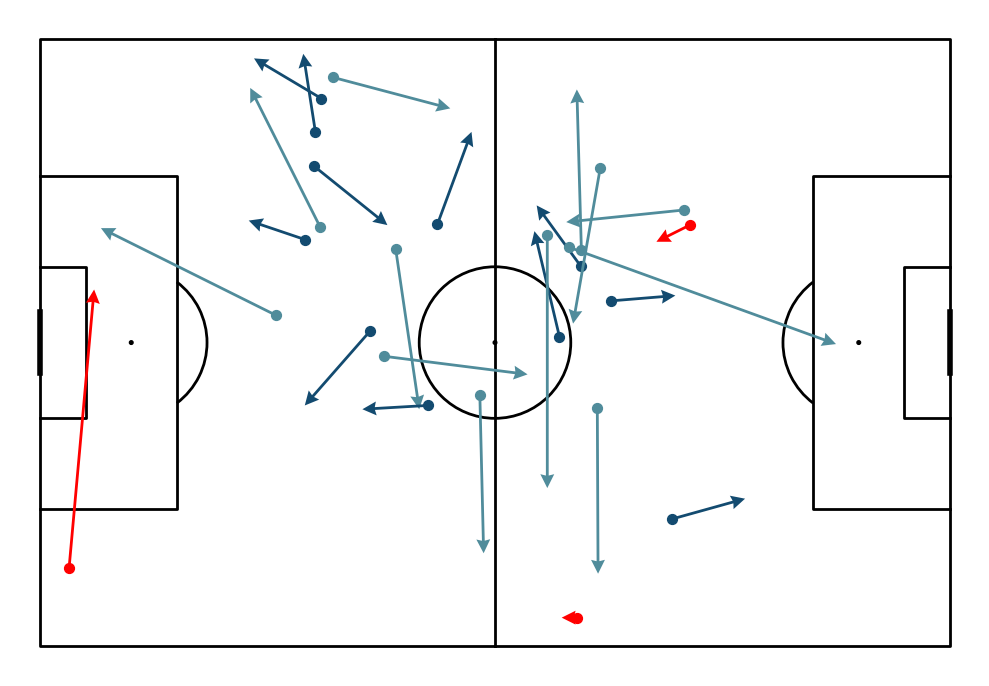

In [15]:
plot_pass_map(rodri_pass_df,color_map_spain)

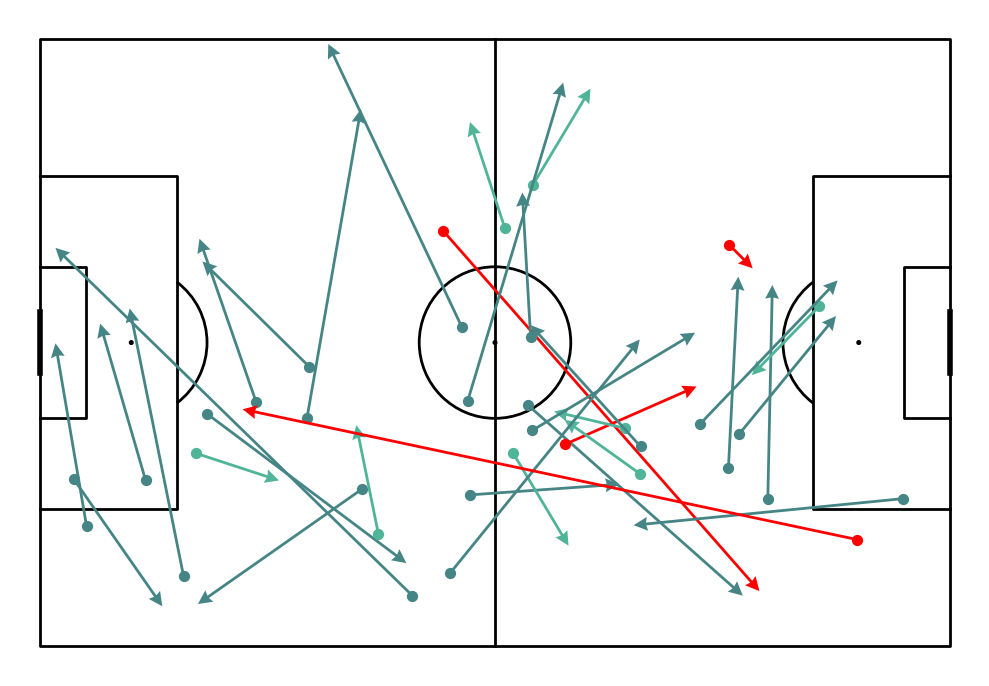

In [16]:
plot_pass_map(rice_df,color_map=color_map_eng)